In [5]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import ConnectionPatch


# Let's check the data
print(f"Data shape: {df.shape}")
print(f"Date range: {df['Date'].min()} to {df['Date'].max()}")
print(f"Vehicle types: {df['Vehicle_Type'].unique()}")
print(f"Recession periods: {df['Recession'].value_counts()}")

Data shape: (528, 15)
Date range: 1/31/1980 to 9/30/2023
Vehicle types: ['Supperminicar' 'Mediumfamilycar' 'Smallfamiliycar' 'Sports'
 'Executivecar']
Recession periods: Recession
0    415
1    113
Name: count, dtype: int64


In [3]:
path="/historical_automobile_sales.csv"
df=pd.read_csv(path)
df.head(5)

,Date,Year,Month,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales,Vehicle_Type,City
0,1/31/1980,1980,Jan,1,108.24,0.50,27483.571,1558,7,60.223,0.010000,5.4,456.0,Supperminicar,Georgia
1,2/29/1980,1980,Feb,1,98.75,0.75,24308.678,3048,4,45.986,-0.309594,4.8,555.9,Supperminicar,New York
2,3/31/1980,1980,Mar,1,107.48,0.20,28238.443,3137,3,35.141,-0.308614,3.4,620.0,Mediumfamilycar,New York
3,4/30/1980,1980,Apr,1,115.01,1.00,32615.149,1653,7,45.673,0.230596,4.2,702.8,Supperminicar,Illinois
4,5/31/1980,1980,May,1,98.72,0.20,23829.233,1319,4,52.997,0.138197,5.3,770.4,Smallfamiliycar,California


## **1. Line Chart: Automobile Sales Fluctuation Year by Year**

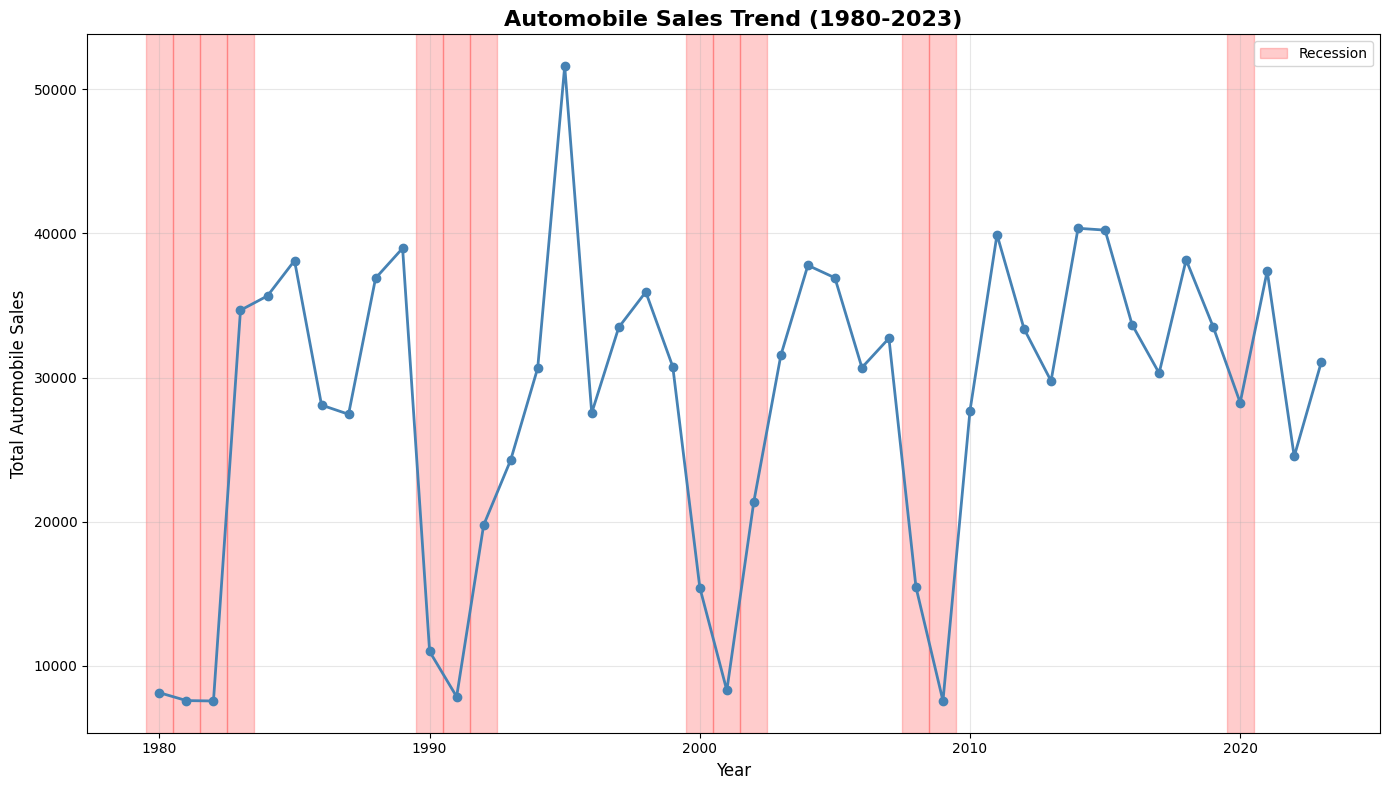

In [6]:
# 1. Line chart showing how automobile sales fluctuate year by year
plt.figure(figsize=(14, 8))

# Group by year and calculate total sales
yearly_sales = df.groupby('Year')['Automobile_Sales'].sum()

# Plot the line chart
plt.plot(yearly_sales.index, yearly_sales.values,
         marker='o', linewidth=2, markersize=6, color='steelblue')

# Add recession periods as shaded areas
recession_years = df[df['Recession'] == 1]['Year'].unique()
for year in recession_years:
    plt.axvspan(year - 0.5, year + 0.5, alpha=0.2, color='red', label='Recession' if year == recession_years[0] else "")

plt.title('Automobile Sales Trend (1980-2023)', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Automobile Sales', fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

# **2. Line Chart with Different Vehicle Types During Recession Periods**

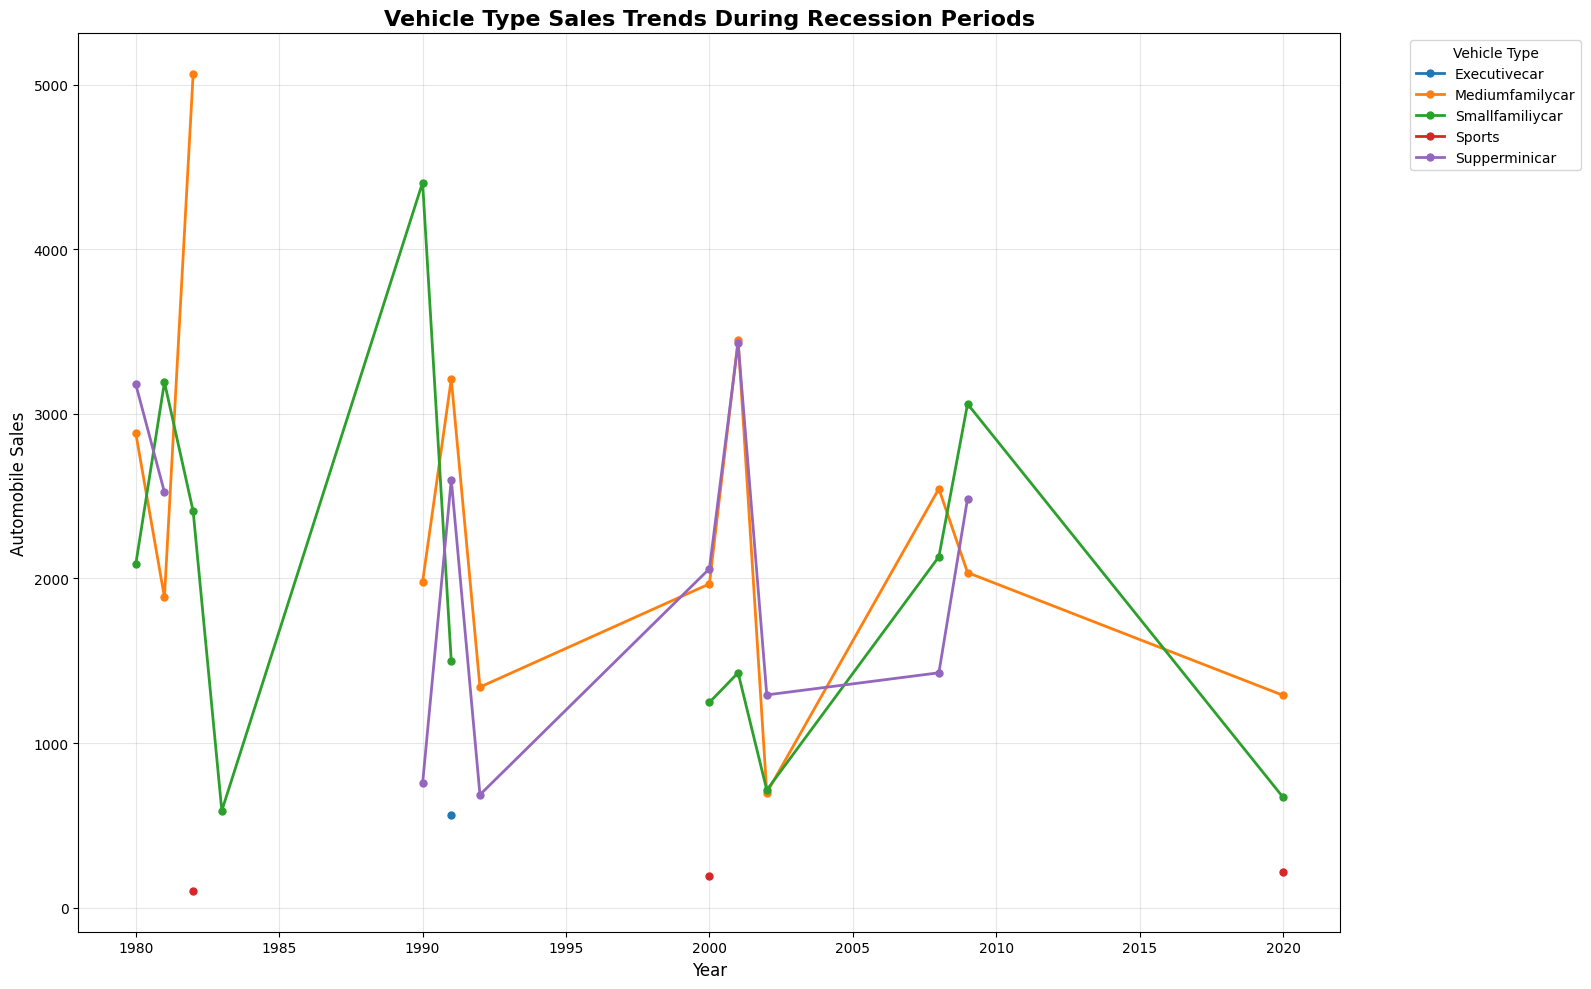


ANALYSIS: Is there a noticeable difference in sales trends between different vehicle types during recession periods?

Sales Trend During Recessions (Positive = Increasing, Negative = Decreasing):
  Sports: 56.0000 (increasing)
  Smallfamiliycar: 3.5058 (increasing)
  Supperminicar: 0.0717 (increasing)
  Mediumfamilycar: -2.3558 (decreasing)


In [7]:
# 2. Plot different lines for categories of vehicle type during recession periods
plt.figure(figsize=(16, 10))

# Filter data for recession periods
recession_data = df[df['Recession'] == 1]

# Group by year and vehicle type for recession periods
yearly_vehicle_sales = recession_data.groupby(['Year', 'Vehicle_Type'])['Automobile_Sales'].sum().unstack()

# Plot each vehicle type
for vehicle_type in yearly_vehicle_sales.columns:
    plt.plot(yearly_vehicle_sales.index, yearly_vehicle_sales[vehicle_type],
             marker='o', linewidth=2, markersize=5, label=vehicle_type)

plt.title('Vehicle Type Sales Trends During Recession Periods', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Automobile Sales', fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend(title='Vehicle Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Analysis of trends
print("\n" + "="*60)
print("ANALYSIS: Is there a noticeable difference in sales trends between different vehicle types during recession periods?")
print("="*60)

# Calculate percentage change during recession periods for each vehicle type
vehicle_trends = {}
for vehicle in df['Vehicle_Type'].unique():
    vehicle_data = recession_data[recession_data['Vehicle_Type'] == vehicle]
    if len(vehicle_data) > 0:
        # Group by year and calculate mean sales
        yearly_sales = vehicle_data.groupby('Year')['Automobile_Sales'].mean()
        if len(yearly_sales) > 1:
            # Calculate trend (slope of linear regression)
            x = np.arange(len(yearly_sales))
            y = yearly_sales.values
            slope = np.polyfit(x, y, 1)[0]
            vehicle_trends[vehicle] = slope

# Sort by trend
sorted_trends = sorted(vehicle_trends.items(), key=lambda x: x[1], reverse=True)
print("\nSales Trend During Recessions (Positive = Increasing, Negative = Decreasing):")
for vehicle, trend in sorted_trends:
    trend_direction = "increasing" if trend > 0 else "decreasing"
    print(f"  {vehicle}: {trend:.4f} ({trend_direction})")

# **3.Comparison: Recession vs Non-Recession Periods by Vehicle Type**

/tmp/ipython-input-2886082473.py:49: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels([vt[:15] + '...' if len(vt) > 15 else vt for vt in percentage_change.index], rotation=45, ha='right')


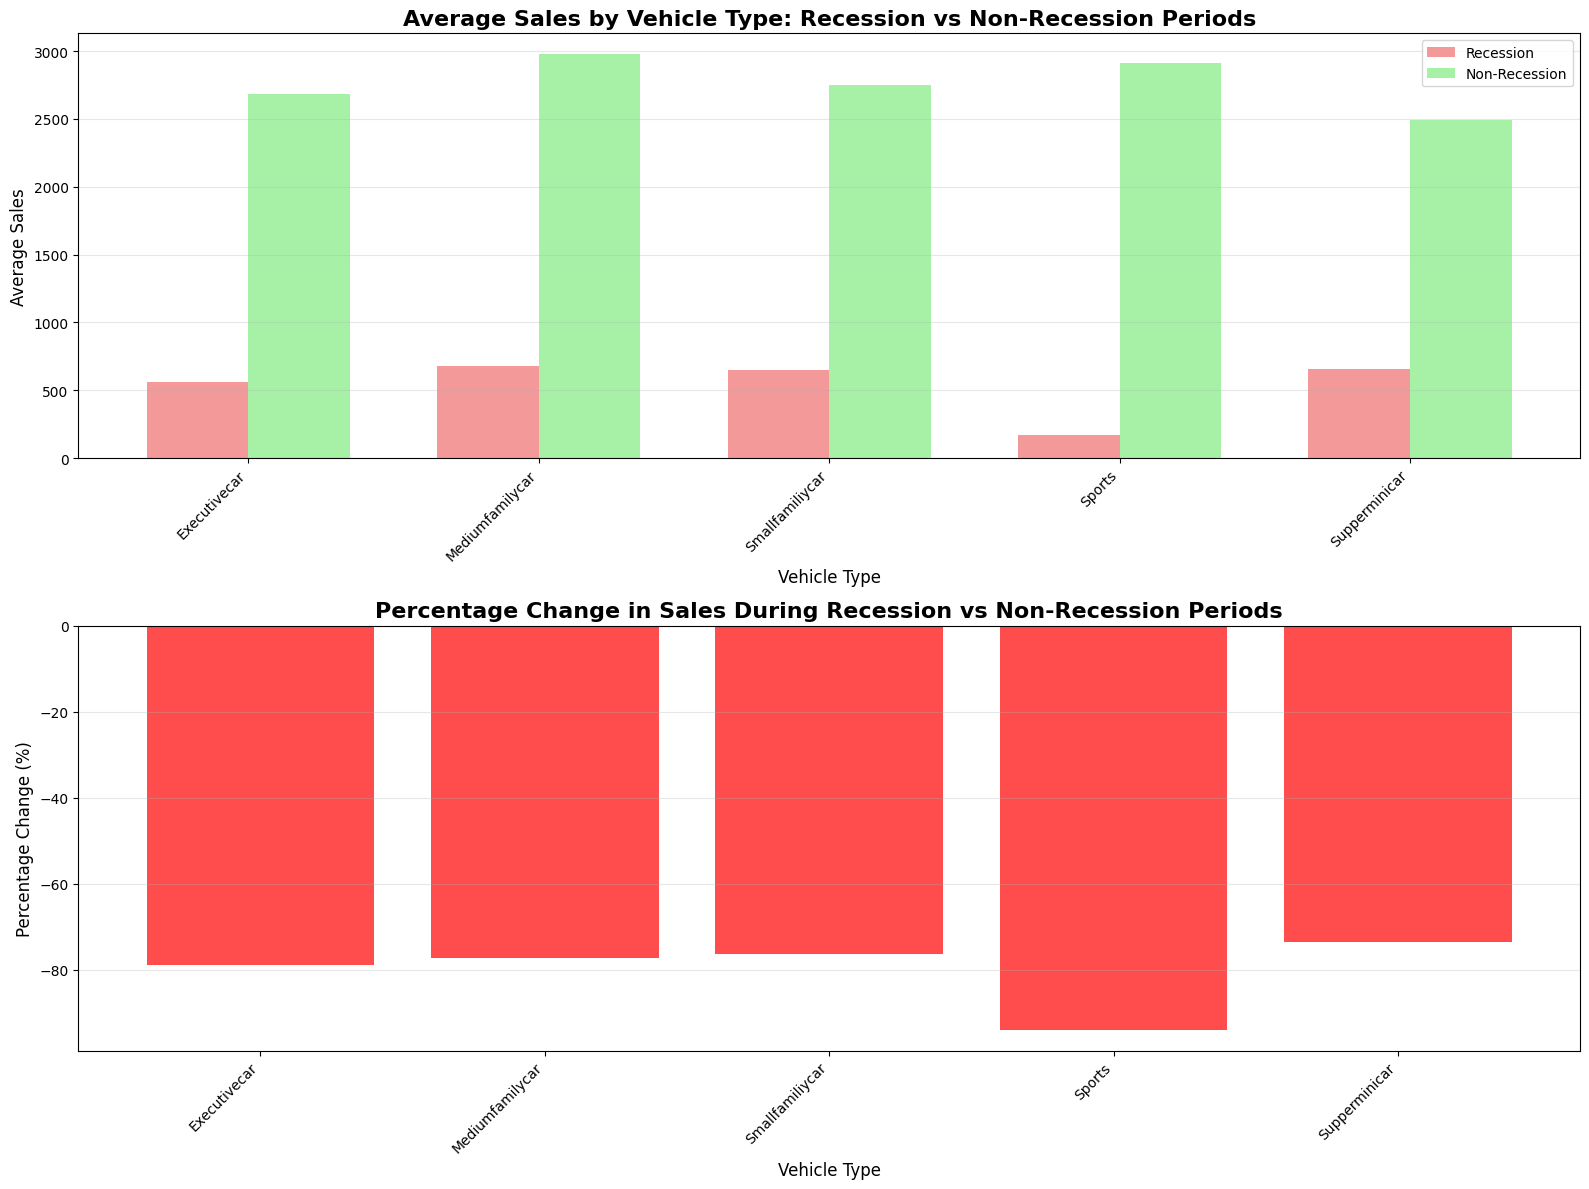


KEY INSIGHTS: Recession Impact by Vehicle Type

Most affected during recessions: Sports (-94.1% change)
Least affected during recessions: Supperminicar (-73.6% change)
Overall average change during recessions: -80.3%


In [8]:
# 3. Create a visualization to compare sales trend per vehicle type for recession vs non-recession periods
fig, axes = plt.subplots(2, 1, figsize=(16, 12))

# Get vehicle types
vehicle_types = df['Vehicle_Type'].unique()

# Prepare data for recession and non-recession periods
recession_sales_by_type = df[df['Recession'] == 1].groupby('Vehicle_Type')['Automobile_Sales'].mean()
non_recession_sales_by_type = df[df['Recession'] == 0].groupby('Vehicle_Type')['Automobile_Sales'].mean()

# Ensure all vehicle types are in both series
all_types = set(vehicle_types)
for vt in all_types:
    if vt not in recession_sales_by_type.index:
        recession_sales_by_type[vt] = 0
    if vt not in non_recession_sales_by_type.index:
        non_recession_sales_by_type[vt] = 0

# Sort by vehicle type for consistent ordering
recession_sales_by_type = recession_sales_by_type.reindex(sorted(all_types))
non_recession_sales_by_type = non_recession_sales_by_type.reindex(sorted(all_types))

# Plot 1: Recession Period
x = np.arange(len(all_types))
width = 0.35

axes[0].bar(x - width/2, recession_sales_by_type.values, width, label='Recession', color='lightcoral', alpha=0.8)
axes[0].bar(x + width/2, non_recession_sales_by_type.values, width, label='Non-Recession', color='lightgreen', alpha=0.8)

axes[0].set_title('Average Sales by Vehicle Type: Recession vs Non-Recession Periods', fontsize=16, fontweight='bold')
axes[0].set_xlabel('Vehicle Type', fontsize=12)
axes[0].set_ylabel('Average Sales', fontsize=12)
axes[0].set_xticks(x)
axes[0].set_xticklabels([vt[:15] + '...' if len(vt) > 15 else vt for vt in recession_sales_by_type.index], rotation=45, ha='right')
axes[0].legend()
axes[0].grid(True, alpha=0.3, axis='y')

# Plot 2: Percentage change during recession vs non-recession
percentage_change = ((recession_sales_by_type - non_recession_sales_by_type) / non_recession_sales_by_type * 100)

# Create a color map based on percentage change
colors = ['red' if pc < 0 else 'green' for pc in percentage_change]

axes[1].bar(percentage_change.index, percentage_change.values, color=colors, alpha=0.7)
axes[1].axhline(y=0, color='black', linestyle='-', linewidth=0.5)
axes[1].set_title('Percentage Change in Sales During Recession vs Non-Recession Periods', fontsize=16, fontweight='bold')
axes[1].set_xlabel('Vehicle Type', fontsize=12)
axes[1].set_ylabel('Percentage Change (%)', fontsize=12)
axes[1].set_xticklabels([vt[:15] + '...' if len(vt) > 15 else vt for vt in percentage_change.index], rotation=45, ha='right')
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

# Calculate and display key insights
print("\n" + "="*60)
print("KEY INSIGHTS: Recession Impact by Vehicle Type")
print("="*60)

# Find most and least affected vehicle types
most_affected = percentage_change.idxmin()
least_affected = percentage_change.idxmax()

print(f"\nMost affected during recessions: {most_affected} ({percentage_change[most_affected]:.1f}% change)")
print(f"Least affected during recessions: {least_affected} ({percentage_change[least_affected]:.1f}% change)")

# Calculate overall average
overall_change = ((recession_sales_by_type.mean() - non_recession_sales_by_type.mean()) / non_recession_sales_by_type.mean() * 100)
print(f"Overall average change during recessions: {overall_change:.1f}%")

# **4. Scatter Plot: Vehicle Price vs Sales Volume During Recessions**

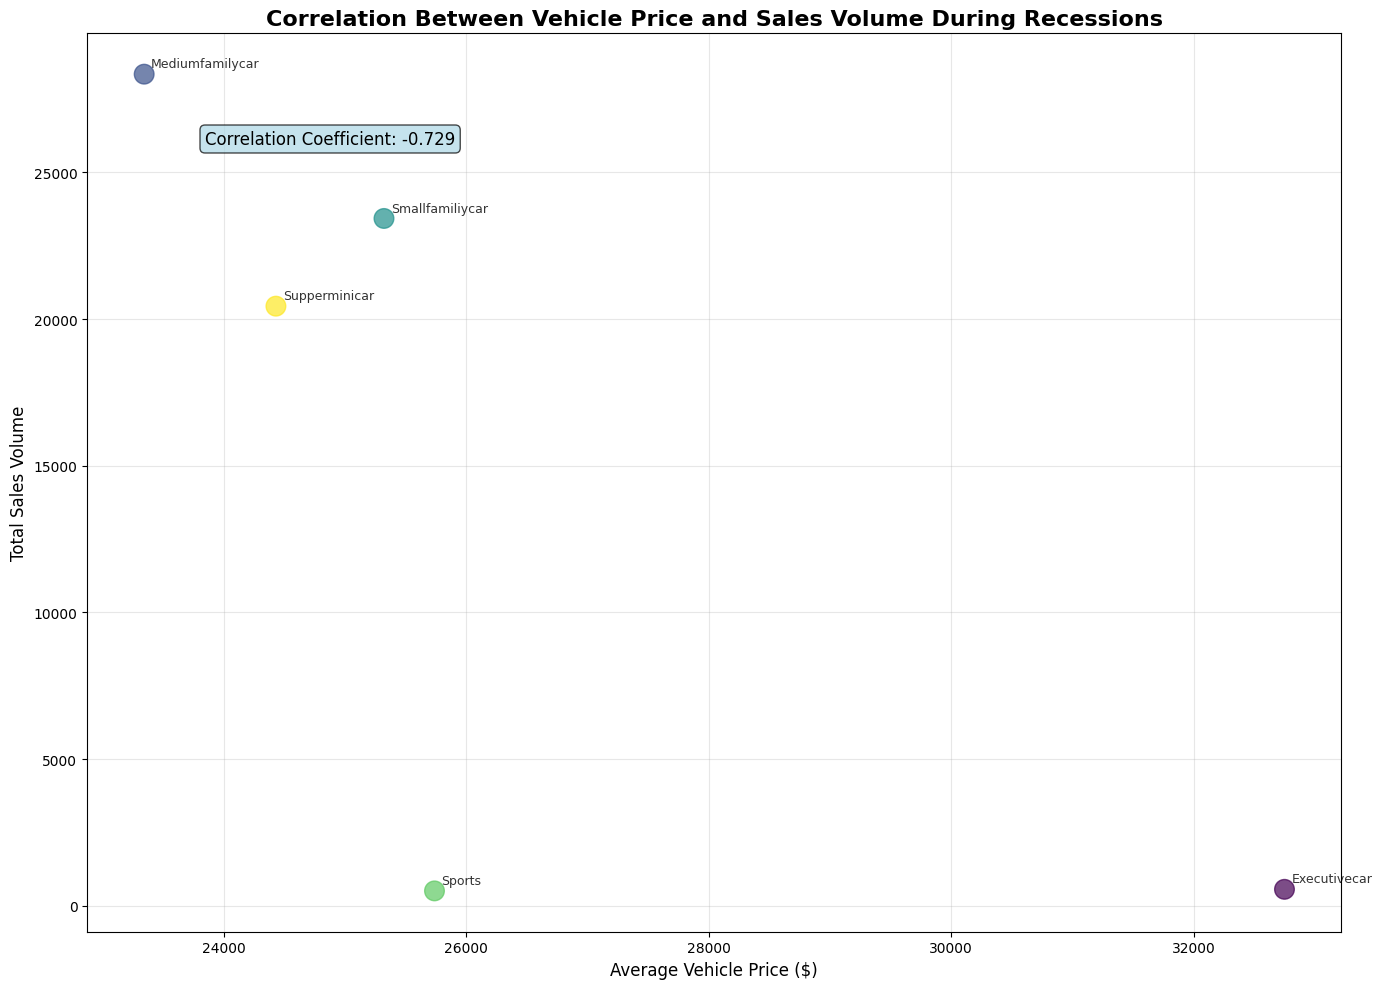


PRICE-SALES CORRELATION ANALYSIS DURING RECESSIONS

Correlation between price and sales: -0.729
Strong negative correlation: Higher prices associated with lower sales during recessions


In [9]:
# 4. Scatter plot to identify correlation between average vehicle price and sales volume during recessions
plt.figure(figsize=(14, 10))

# Filter recession data
recession_df = df[df['Recession'] == 1]

# Group by vehicle type and calculate average price and total sales
vehicle_stats = recession_df.groupby('Vehicle_Type').agg({
    'Price': 'mean',
    'Automobile_Sales': 'sum'
}).reset_index()

# Create scatter plot
scatter = plt.scatter(vehicle_stats['Price'], vehicle_stats['Automobile_Sales'],
                      s=200, alpha=0.7, cmap='viridis', c=range(len(vehicle_stats)))

# Add labels for each point
for i, row in vehicle_stats.iterrows():
    plt.annotate(row['Vehicle_Type'],
                 (row['Price'], row['Automobile_Sales']),
                 xytext=(5, 5), textcoords='offset points',
                 fontsize=9, alpha=0.8)

plt.title('Correlation Between Vehicle Price and Sales Volume During Recessions', fontsize=16, fontweight='bold')
plt.xlabel('Average Vehicle Price ($)', fontsize=12)
plt.ylabel('Total Sales Volume', fontsize=12)
plt.grid(True, alpha=0.3)

# Calculate and display correlation coefficient
correlation = np.corrcoef(vehicle_stats['Price'], vehicle_stats['Automobile_Sales'])[0, 1]
plt.figtext(0.15, 0.85, f'Correlation Coefficient: {correlation:.3f}',
            fontsize=12, bbox=dict(boxstyle="round,pad=0.3", facecolor="lightblue", alpha=0.7))

plt.tight_layout()
plt.show()

# Additional analysis
print("\n" + "="*60)
print("PRICE-SALES CORRELATION ANALYSIS DURING RECESSIONS")
print("="*60)
print(f"\nCorrelation between price and sales: {correlation:.3f}")

if correlation < -0.5:
    print("Strong negative correlation: Higher prices associated with lower sales during recessions")
elif correlation > 0.5:
    print("Strong positive correlation: Higher prices associated with higher sales during recessions")
elif abs(correlation) < 0.3:
    print("Weak correlation: Price has little relationship with sales during recessions")
else:
    print("Moderate correlation")

# **5.Pie Chart: Advertising Expenditure During Recession vs Non-Recession Periods**

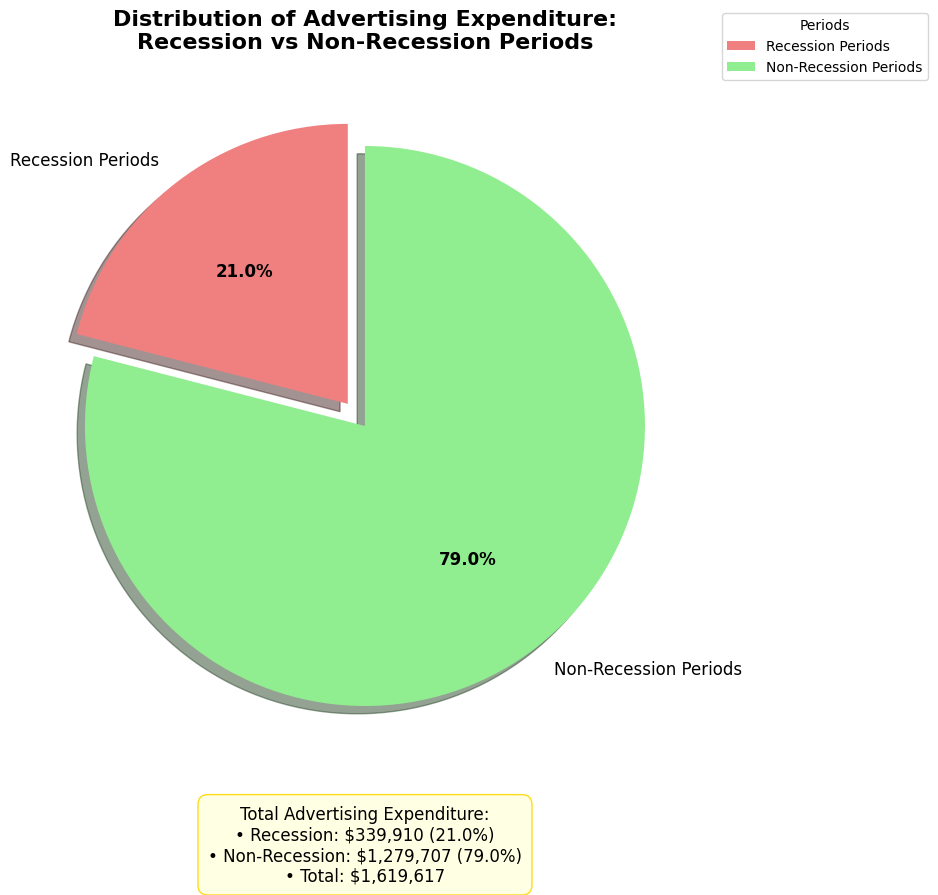


ADVERTISING EXPENDITURE ANALYSIS

Advertising Expenditure per Sale:
  During recessions: $4.64 per sale
  During non-recessions: $1.09 per sale
  → Companies spend 323.7% more per sale during recessions


In [12]:
# 5. Pie chart to display advertising expenditure during recession and non-recession periods
fig, ax = plt.subplots(figsize=(14, 10))

# Calculate total advertising expenditure for each period
total_ad_recession = df[df['Recession'] == 1]['Advertising_Expenditure'].sum()
total_ad_non_recession = df[df['Recession'] == 0]['Advertising_Expenditure'].sum()

# Data for pie chart
labels = ['Recession Periods', 'Non-Recession Periods']
sizes = [total_ad_recession, total_ad_non_recession]
colors = ['lightcoral', 'lightgreen']
explode = (0.1, 0)  # explode the 1st slice

# Create pie chart with explicit axes
wedges, texts, autotexts = ax.pie(sizes, explode=explode, labels=labels, colors=colors,
                                  autopct='%1.1f%%', shadow=True, startangle=90,
                                  textprops={'fontsize': 12})

# Improve text visibility
for autotext in autotexts:
    autotext.set_color('black')
    autotext.set_fontweight('bold')

# Set aspect ratio to equal to make it a circle
ax.set_aspect('equal')

# Set title
ax.set_title('Distribution of Advertising Expenditure:\nRecession vs Non-Recession Periods',
             fontsize=16, fontweight='bold', pad=20)

# Add summary statistics with better positioning
total_ad = total_ad_recession + total_ad_non_recession
recession_percentage = (total_ad_recession / total_ad) * 100

# Create a text box for summary statistics
summary_text = (f'Total Advertising Expenditure:\n'
                f'• Recession: ${total_ad_recession:,.0f} ({recession_percentage:.1f}%)\n'
                f'• Non-Recession: ${total_ad_non_recession:,.0f} ({100-recession_percentage:.1f}%)\n'
                f'• Total: ${total_ad:,.0f}')

# Position the text box at the bottom
ax.text(0.5, -0.15, summary_text, transform=ax.transAxes,
        ha='center', fontsize=12,
        bbox=dict(boxstyle="round,pad=0.6", facecolor="lightyellow",
                  edgecolor='gold', alpha=0.9))

# Add a legend for better clarity
ax.legend(wedges, labels, title="Periods", loc="upper left",
          bbox_to_anchor=(1, 0.8, 0.3, 0.3))

# Adjust layout without tight_layout to prevent shaking
plt.subplots_adjust(left=0.1, right=0.75, top=0.9, bottom=0.2)

plt.show()

# Additional analysis: Advertising intensity (ad spending per sale)
print("\n" + "="*60)
print("ADVERTISING EXPENDITURE ANALYSIS")
print("="*60)

# Calculate advertising per sale
total_sales_recession = df[df['Recession'] == 1]['Automobile_Sales'].sum()
total_sales_non_recession = df[df['Recession'] == 0]['Automobile_Sales'].sum()

ad_per_sale_recession = total_ad_recession / total_sales_recession if total_sales_recession > 0 else 0
ad_per_sale_non_recession = total_ad_non_recession / total_sales_non_recession if total_sales_non_recession > 0 else 0

print(f"\nAdvertising Expenditure per Sale:")
print(f"  During recessions: ${ad_per_sale_recession:.2f} per sale")
print(f"  During non-recessions: ${ad_per_sale_non_recession:.2f} per sale")

if ad_per_sale_recession > ad_per_sale_non_recession:
    print(f"  → Companies spend {((ad_per_sale_recession/ad_per_sale_non_recession)-1)*100:.1f}% more per sale during recessions")
else:
    print(f"  → Companies spend {((ad_per_sale_non_recession/ad_per_sale_recession)-1)*100:.1f}% more per sale during non-recessions")